In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(mltools)
library(MLmetrics)
library(nnet)
library(MASS)
library(caret)
library(ISLR2)
library(boot)
library(caret)
library(nnet)
library(rsample)
library(tidymodels)
library(recipes)
library(DataExplorer)
library(discrim)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:MLmetrics’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘ISLR2’


The fo

[1] "forest-frenzy"

Importing Data

In [2]:
test<-read.csv("/kaggle/input/forest-frenzy/test.csv")
train<-read.csv("/kaggle/input/forest-frenzy/train.csv")
sample<-("/kaggle/input/forest-frenzy/sample_submission.csv")

EDA

In [3]:
View(test)
View(train)
summary(test)
summary(train)
sapply(train, anyNA)
sapply(test, anyNA)

id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,⋯,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A200001,3089,355,5,630,88,2144,211,230,157,⋯,0,1,0,0,0,0,0,0,0,0
A200002,3165,56,10,510,-29,797,227,218,124,⋯,0,0,0,0,0,0,0,0,0,0
A200003,3142,23,8,633,125,1674,216,223,144,⋯,1,0,0,0,0,0,0,0,0,0
A200004,2782,330,23,85,7,1368,158,204,182,⋯,0,0,0,0,0,0,0,0,0,0
A200005,2775,36,14,150,24,1316,218,208,123,⋯,0,1,0,0,0,0,0,0,0,0
A200006,2658,6,9,283,15,1323,210,223,151,⋯,0,0,0,0,0,0,0,0,0,0
A200007,3341,276,24,577,-6,540,148,237,224,⋯,0,0,0,0,0,0,0,0,0,0
A200008,2314,99,11,0,0,242,238,225,117,⋯,0,0,0,0,0,0,0,0,0,0
A200009,2834,49,9,351,36,781,224,221,131,⋯,0,0,0,0,0,0,0,0,0,0


id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,⋯,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1,2840,20,6,42,6,566,216,228,149,⋯,0,0,0,0,0,0,0,0,0,2
A2,2690,95,11,0,0,1605,238,223,114,⋯,0,0,0,0,0,0,0,0,0,2
A3,2759,22,17,0,0,752,207,200,126,⋯,0,0,0,0,0,0,0,0,0,1
A4,3140,51,27,400,219,1981,222,172,68,⋯,0,1,0,0,0,0,0,0,0,1
A5,3170,29,6,30,1,1288,218,226,144,⋯,0,0,0,0,0,0,0,0,0,2
A6,2780,148,16,60,-3,3416,240,237,121,⋯,0,0,0,0,0,0,0,0,0,1
A7,2871,134,24,175,62,4302,249,221,85,⋯,0,0,0,0,0,0,0,0,0,2
A8,2964,26,13,153,19,1919,213,211,131,⋯,0,0,0,0,0,0,0,0,0,1
A9,2743,240,9,60,12,1507,203,248,182,⋯,0,0,0,0,0,0,0,0,0,5


      id              elevation        aspect          slope      
 Length:200000      Min.   :1868   Min.   :  0.0   Min.   : 0.00  
 Class :character   1st Qu.:2810   1st Qu.: 59.0   1st Qu.: 9.00  
 Mode  :character   Median :2997   Median :128.0   Median :13.00  
                    Mean   :2960   Mean   :156.2   Mean   :14.09  
                    3rd Qu.:3163   3rd Qu.:262.0   3rd Qu.:18.00  
                    Max.   :3852   Max.   :360.0   Max.   :62.00  
 horizontal_distance_to_hydrology vertical_distance_to_hydrology
 Min.   :   0                     Min.   :-159.00               
 1st Qu.: 108                     1st Qu.:   7.00               
 Median : 218                     Median :  29.00               
 Mean   : 269                     Mean   :  46.33               
 3rd Qu.: 384                     3rd Qu.:  69.00               
 Max.   :1390                     Max.   : 595.00               
 horizontal_distance_to_roadways hillshade_9am   hillshade_noon 
 Min.   :  

      id              elevation        aspect          slope      
 Length:200000      Min.   :1859   Min.   :  0.0   Min.   : 0.00  
 Class :character   1st Qu.:2808   1st Qu.: 58.0   1st Qu.: 9.00  
 Mode  :character   Median :2995   Median :127.0   Median :13.00  
                    Mean   :2959   Mean   :155.4   Mean   :14.11  
                    3rd Qu.:3163   3rd Qu.:260.0   3rd Qu.:18.00  
                    Max.   :3858   Max.   :360.0   Max.   :66.00  
 horizontal_distance_to_hydrology vertical_distance_to_hydrology
 Min.   :   0.0                   Min.   :-173.00               
 1st Qu.: 108.0                   1st Qu.:   7.00               
 Median : 218.0                   Median :  30.00               
 Mean   : 269.6                   Mean   :  46.52               
 3rd Qu.: 384.0                   3rd Qu.:  69.00               
 Max.   :1390.0                   Max.   : 601.00               
 horizontal_distance_to_roadways hillshade_9am   hillshade_noon 
 Min.   :  

id                          elevation 
                             FALSE                              FALSE 
                            aspect                              slope 
                             FALSE                              FALSE 
  horizontal_distance_to_hydrology     vertical_distance_to_hydrology 
                             FALSE                              FALSE 
   horizontal_distance_to_roadways                      hillshade_9am 
                             FALSE                              FALSE 
                    hillshade_noon                      hillshade_3pm 
                             FALSE                              FALSE 
horizontal_distance_to_fire_points                   wilderness_area1 
                             FALSE                              FALSE 
                  wilderness_area2                   wilderness_area3 
                             FALSE                              FALSE 
                  wilderness_area4                         soil_type1 
                             FALSE                              FALSE 
                        soil_type2                         soil_type3 
                             FALSE                              FALSE 
                        soil_type4                         soil_type5 
                             FALSE                              FALSE 
                        soil_type6                         soil_type7 
                             FALSE                              FALSE 
                        soil_type8                         soil_type9 
                             FALSE                              FALSE 
                       soil_type10                        soil_type11 
                             FALSE                              FALSE 
                       soil_type12                        soil_type13 
                             FALSE                              FALSE 
                       soil_type14                        soil_type15 
                             FALSE                              FALSE 
                       soil_type16                        soil_type17 
                             FALSE                              FALSE 
                       soil_type18                        soil_type19 
                             FALSE                              FALSE 
                       soil_type20                        soil_type21 
                             FALSE                              FALSE 
                       soil_type22                        soil_type23 
                             FALSE                              FALSE 
                       soil_type24                        soil_type25 
                             FALSE                              FALSE 
                       soil_type26                        soil_type27 
                             FALSE                              FALSE 
                       soil_type28                        soil_type29 
                             FALSE                              FALSE 
                       soil_type30                        soil_type31 
                             FALSE                              FALSE 
                       soil_type32                        soil_type33 
                             FALSE                              FALSE 
                       soil_type34                        soil_type35 
                             FALSE                              FALSE 
                       soil_type36                        soil_type37 
                             FALSE                              FALSE 
                       soil_type38                        soil_type39 
                             FALSE                              FALSE 
                       soil_type40                         cover_type 
                             FALSE                              FALSE

id                          elevation 
                             FALSE                              FALSE 
                            aspect                              slope 
                             FALSE                              FALSE 
  horizontal_distance_to_hydrology     vertical_distance_to_hydrology 
                             FALSE                              FALSE 
   horizontal_distance_to_roadways                      hillshade_9am 
                             FALSE                              FALSE 
                    hillshade_noon                      hillshade_3pm 
                             FALSE                              FALSE 
horizontal_distance_to_fire_points                   wilderness_area1 
                             FALSE                              FALSE 
                  wilderness_area2                   wilderness_area3 
                             FALSE                              FALSE 
                  wilderness_area4                         soil_type1 
                             FALSE                              FALSE 
                        soil_type2                         soil_type3 
                             FALSE                              FALSE 
                        soil_type4                         soil_type5 
                             FALSE                              FALSE 
                        soil_type6                         soil_type7 
                             FALSE                              FALSE 
                        soil_type8                         soil_type9 
                             FALSE                              FALSE 
                       soil_type10                        soil_type11 
                             FALSE                              FALSE 
                       soil_type12                        soil_type13 
                             FALSE                              FALSE 
                       soil_type14                        soil_type15 
                             FALSE                              FALSE 
                       soil_type16                        soil_type17 
                             FALSE                              FALSE 
                       soil_type18                        soil_type19 
                             FALSE                              FALSE 
                       soil_type20                        soil_type21 
                             FALSE                              FALSE 
                       soil_type22                        soil_type23 
                             FALSE                              FALSE 
                       soil_type24                        soil_type25 
                             FALSE                              FALSE 
                       soil_type26                        soil_type27 
                             FALSE                              FALSE 
                       soil_type28                        soil_type29 
                             FALSE                              FALSE 
                       soil_type30                        soil_type31 
                             FALSE                              FALSE 
                       soil_type32                        soil_type33 
                             FALSE                              FALSE 
                       soil_type34                        soil_type35 
                             FALSE                              FALSE 
                       soil_type36                        soil_type37 
                             FALSE                              FALSE 
                       soil_type38                        soil_type39 
                             FALSE                              FALSE 
                       soil_type40 
                             FALSE

It's quite a big data set with 55 variables and no N/A values. As a result, there is not much to be cleaned as much as organized. In line with some of the other classmates, I think the models would benefit if the soil variables were grouped together, same with 

In [5]:
summary(train$wilderness_area1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4489  1.0000  1.0000 

#Viewing the hidden columns

In [6]:
View(train[,11:32])

horizontal_distance_to_fire_points,wilderness_area1,wilderness_area2,wilderness_area3,wilderness_area4,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,⋯,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
566,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2346,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
2082,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2754,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1205,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3101,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
558,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3295,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2462,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


K-folds/ DS

In [5]:
ctrl <- trainControl(method = "cv", number = 5)

In [6]:
#creating validation data
set.seed(123)
trainindex <- createDataPartition(train$cover_type, p = 0.8, list = FALSE)
traindata <- train[trainindex, ]
validationdata <- train[-trainindex, ]

So, what I have done so far is cleaned the data a bit so I can work with soil type and wilderness (formerly binary data) to consider them collectively. I also removed the previous column names, because I want to start running some comparisions and the extra columns would make displays messy. 

I had noticed that some people had combined values for variables like hillshade. I have decided not to do that, as if the combined value showed some significant relation, I would then have to go back and unpack that variable to determine what exact time/ hillshade (which seems like more work in the end.

I want to, next, run a scatterplot to determine what variables I might include in my analysis. I also want to visualize the cover_type data to get a better understanding of the outcome variable. 

In [7]:
#Combining Soil and Wilderness Columns into One
train$all_soil<- apply(train[,paste0("soil_type", 1:40)],1,function(x) which(x == 1))
train$all_wild<-apply(train[,paste0("wilderness_area",1:4)],1,function(x)which(x==1))
test$all_soil<- apply(test[,paste0("soil_type", 1:40)],1,function(x) which(x == 1))
test$all_wild<-apply(test[,paste0("wilderness_area",1:4)],1,function(x)which(x==1))

#Changing class of columns
train <- train %>% mutate_at(c("all_soil", "all_wild", "cover_type"), as.factor)
test <- test %>% mutate_at(c("all_soil", "all_wild"), as.factor)
                     
#Dropping old Columns                  
train1 = train[,!grepl("soil_type", names(train))]
train = train1[,!grepl("wilderness_area", names(train1))]
test1 = test[,!grepl("soil_type", names(test))]
test = test1[,!grepl("wilderness_area", names(test1))]
View(train)

id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,cover_type,all_soil,all_wild
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
A1,2840,20,6,42,6,566,216,228,149,566,2,23,3
A2,2690,95,11,0,0,1605,238,223,114,2346,2,17,3
A3,2759,22,17,0,0,752,207,200,126,2082,1,20,1
A4,3140,51,27,400,219,1981,222,172,68,2754,1,33,3
A5,3170,29,6,30,1,1288,218,226,144,1205,2,29,1
A6,2780,148,16,60,-3,3416,240,237,121,3101,1,30,1
A7,2871,134,24,175,62,4302,249,221,85,558,2,22,1
A8,2964,26,13,153,19,1919,213,211,131,3295,1,26,3
A9,2743,240,9,60,12,1507,203,248,182,2462,5,29,1


In [37]:
View(test)

id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,all_soil,all_wild
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
A200001,3089,355,5,630,88,2144,211,230,157,2547,32,3
A200002,3165,56,10,510,-29,797,227,218,124,1341,22,2
A200003,3142,23,8,633,125,1674,216,223,144,2608,31,3
A200004,2782,330,23,85,7,1368,158,204,182,1565,24,3
A200005,2775,36,14,150,24,1316,218,208,123,2255,32,3
A200006,2658,6,9,283,15,1323,210,223,151,5953,12,1
A200007,3341,276,24,577,-6,540,148,237,224,964,22,2
A200008,2314,99,11,0,0,242,238,225,117,1182,1,4
A200009,2834,49,9,351,36,781,224,221,131,335,23,1


In [ ]:
#I had difficulty with this part in terms of generation a correlation plot for this data set, which could guide me to some lead predictor variables. Until I figure this out, I chose predictor variables arbitrarily, for the time being. 

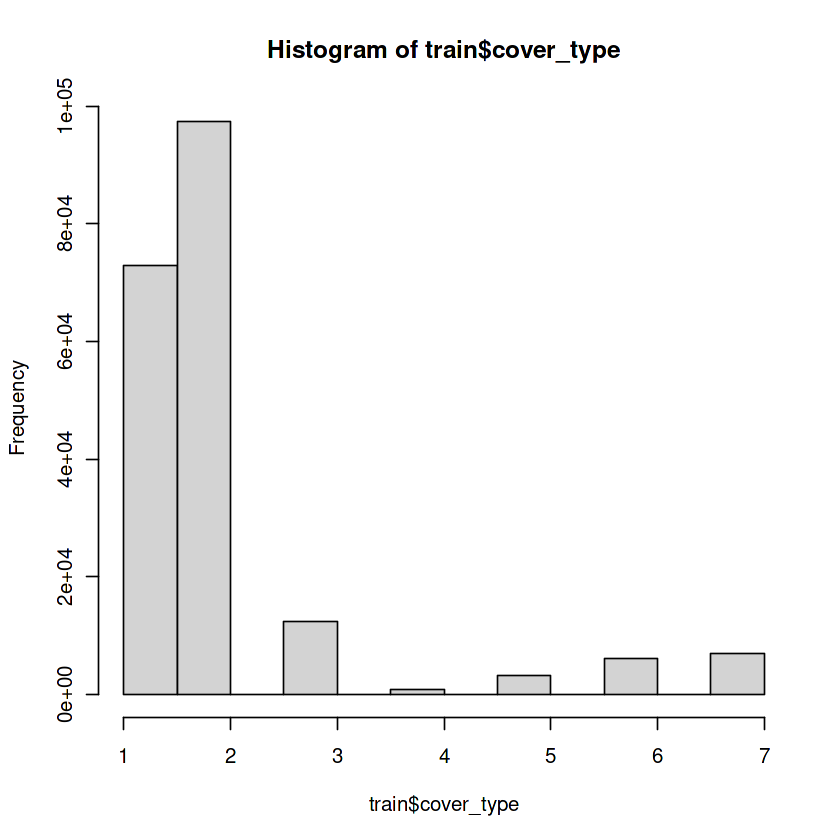

In [24]:
hist(train$cover_type)

The histogram shows that there are a greater number of output for cover types 1 and 2. My I decided to 

In [8]:
#logregression
logreg <- multinom(cover_type ~ aspect + elevation + slope, data = train, trControl = ctrl, method = "multinom")
print(logreg)


# weights:  35 (24 variable)
initial  value 389182.029812 
iter  10 value 317846.137607
iter  20 value 279334.522413
iter  30 value 160483.102463
iter  40 value 153017.661243
iter  50 value 152836.729923
iter  60 value 152835.925827
iter  60 value 152835.925726
final  value 152835.921513 
converged
Call:
multinom(formula = cover_type ~ aspect + elevation + slope, data = train, 
    trControl = ctrl, method = "multinom")

Coefficients:
  (Intercept)        aspect    elevation        slope
2    21.66821  0.0006627518 -0.007074105 -0.002911793
3    58.36798  0.0020703358 -0.021987947  0.040127103
4    71.95359 -0.0008678040 -0.028108875 -0.040630215
5    27.70422 -0.0001303343 -0.010577790  0.041800561
6    57.03396  0.0026349119 -0.021609811  0.020603402
7   -49.94967 -0.0016392123  0.014677954  0.004455831

Residual Deviance: 305671.8 
AIC: 305719.8 


In [39]:
prediction<-predict(logreg, newdata = validationdata)
log_f1 <- F1_Score(validationdata$cover_type, prediction)
log_f1

[1] 0.6505604

QDA

In [40]:
#qda
qda<- train(cover_type ~ aspect + elevation + slope, data = train, method = "qda", trControl = ctrl)
print(qda)
predict_qda<-predict(qda, newdata = validationdata)
qda_f1 <- F1_Score(validationdata$cover_type, predict_qda)
qda_f1


Quadratic Discriminant Analysis 

2e+05 samples
3e+00 predictors
7e+00 classes: '1', '2', '3', '4', '5', '6', '7' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 160002, 159999, 160000, 159999, 160000 
Resampling results:

  Accuracy  Kappa    
  0.670895  0.4493237



[1] 0.6731773

Not the highest accuracy, but its something. 

LDA

In [9]:
#lda
lda <- train(cover_type ~ aspect + elevation + slope, data = train, method = "lda", trControl = ctrl)
print(lda)
predict_lda<-predict(lda, newdata = validationdata)
lda_f1<- F1_Score(validationdata$cover_type, predict_lda)
lda_f1

Linear Discriminant Analysis 

2e+05 samples
3e+00 predictors
7e+00 classes: '1', '2', '3', '4', '5', '6', '7' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 160002, 159999, 160000, 159999, 160000 
Resampling results:

  Accuracy  Kappa    
  0.669275  0.4453578



[1] 0.6602207

NB

In [11]:
#nb
nb <- train(cover_type ~ aspect + elevation + slope, data = train, method = "naive_bayes", trControl = ctrl)
print(nb)
predict_nb<-predict(nb, newdata = validationdata)
nb_f1<- F1_Score(validationdata$cover_type, predict_nb)
nb_f1

Naive Bayes 

2e+05 samples
3e+00 predictors
7e+00 classes: '1', '2', '3', '4', '5', '6', '7' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 160001, 160000, 159998, 160000, 160001 
Resampling results across tuning parameters:

  usekernel  Accuracy  Kappa    
  FALSE      0.66431   0.4396617
   TRUE      0.67576   0.4596905

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = TRUE
 and adjust = 1.


[1] 0.6673155

KNN

In [ ]:
#knn - couldnt get this one to run
knn<-train(cover_type ~ aspect + elevation + slope, data = train, trControl = ctrl, method = "knn")
print(knn)
predict_knn<-predict(knn, newdata = validationdata)
nb_f1<- F1_Score(validationdata$cover_type, predict_knn)
nb_f1

In [19]:
final_predict<- predict(predict_nb,test)
df <- data.frame(id = test$id, cover_type = final_predict)
write_csv(df, "submission.csv")

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "factor"
